This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: f79e65cf-b159-11ed-8db3-3497f6911829


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV)
- plot one example image of each rice species, including the contour

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel
    - Variance for each RGB color channel
    - Skewness for each RGB color channel
    - Kurtosis for each RGB color channel
    - Entropy for each RGB color channel
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (you can use e.g. *contourArea* from OpenCV)
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV)
    - roundness
    - aspect ratio
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.

# Part 2

## Data exploration (2 p)

- Standardize the data
- Plot a boxplot of each feature
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

## Model selection (2 p)

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- Report the best hyperparameter or the best combination of hyperparameters. <br>
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value. <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random as rng
import cv2
import matplotlib.pyplot as plt
import math

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy

from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from itertools import product

Reading in the data

In [3]:
data_path = '..\\training_data\\Rice_Sample_data.csv'
parquet_path = '..\\training_data\\Rice_Sample_data.parquet'

df_parquet = pd.read_parquet(parquet_path)

# Own dataframe for numericals
df_numerical = df_parquet.iloc[:, 3:]

# OHE and Label Encoding the Species data
le = LabelEncoder()
le_species = le.fit_transform(df_parquet['Species'])
df_species = pd.get_dummies(df_parquet['Species'])

# Appending them to the data
df_numerical = df_numerical.join(df_species)
df_numerical['Species_LE'] = le_species

<AxesSubplot: >

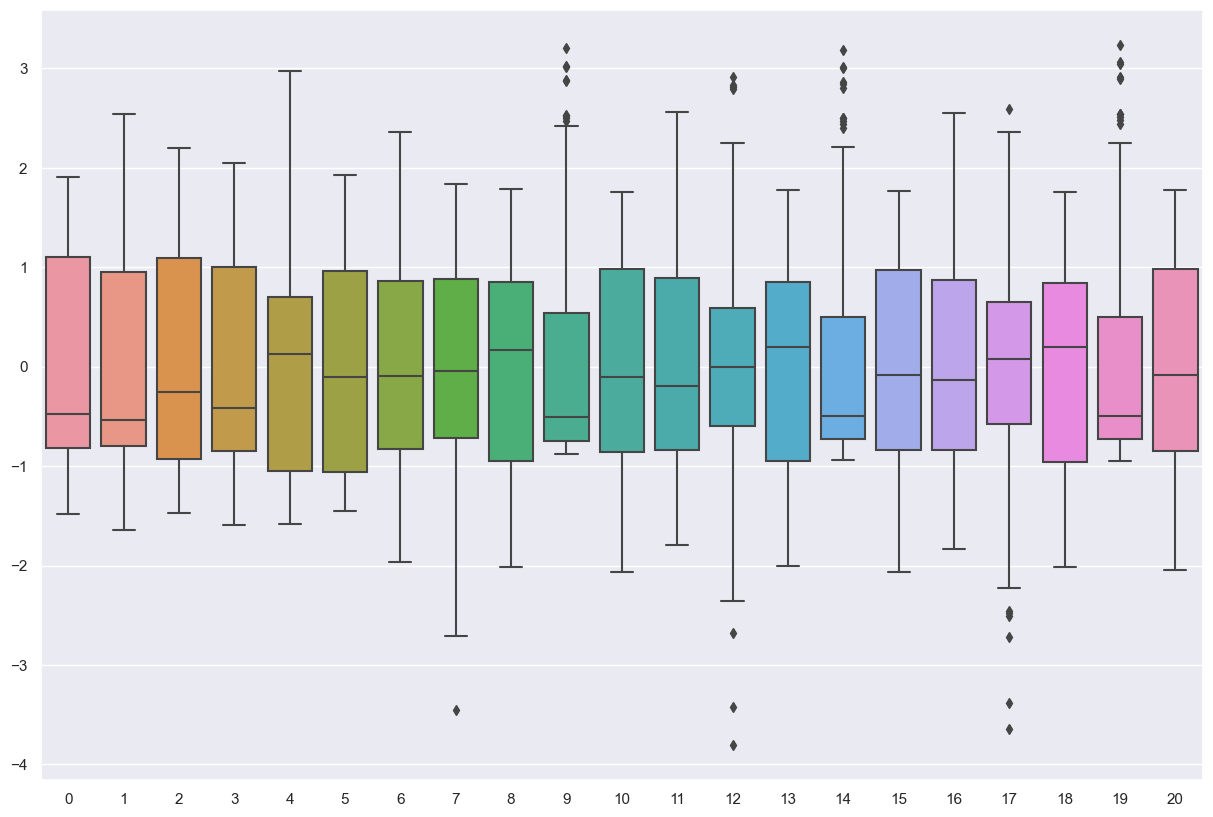

In [133]:
#
y = df_numerical['Species_LE']
X = df_numerical.iloc[:, :21]

# Using StandardScaler to scale the data
StScaler = StandardScaler()
df_standardized_og = StScaler.fit_transform(X)

# Plotting StandardScaled data
sns.boxplot(df_standardized_og)

In [134]:
print('X:',X.shape, 'y:',y.shape, 'df:', df_numerical.shape)

X: (300, 21) y: (300,) df: (300, 25)


<AxesSubplot: ylabel='Count'>

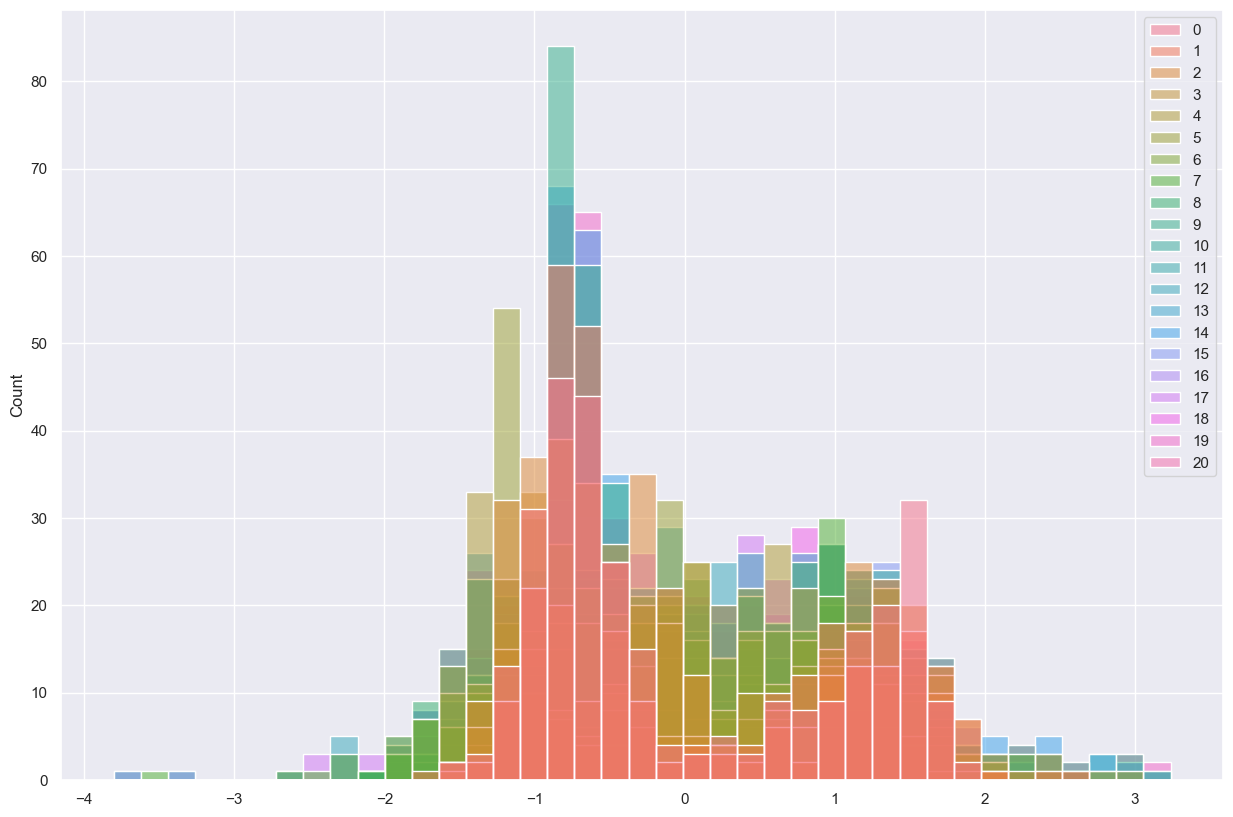

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(df_standardized_og)

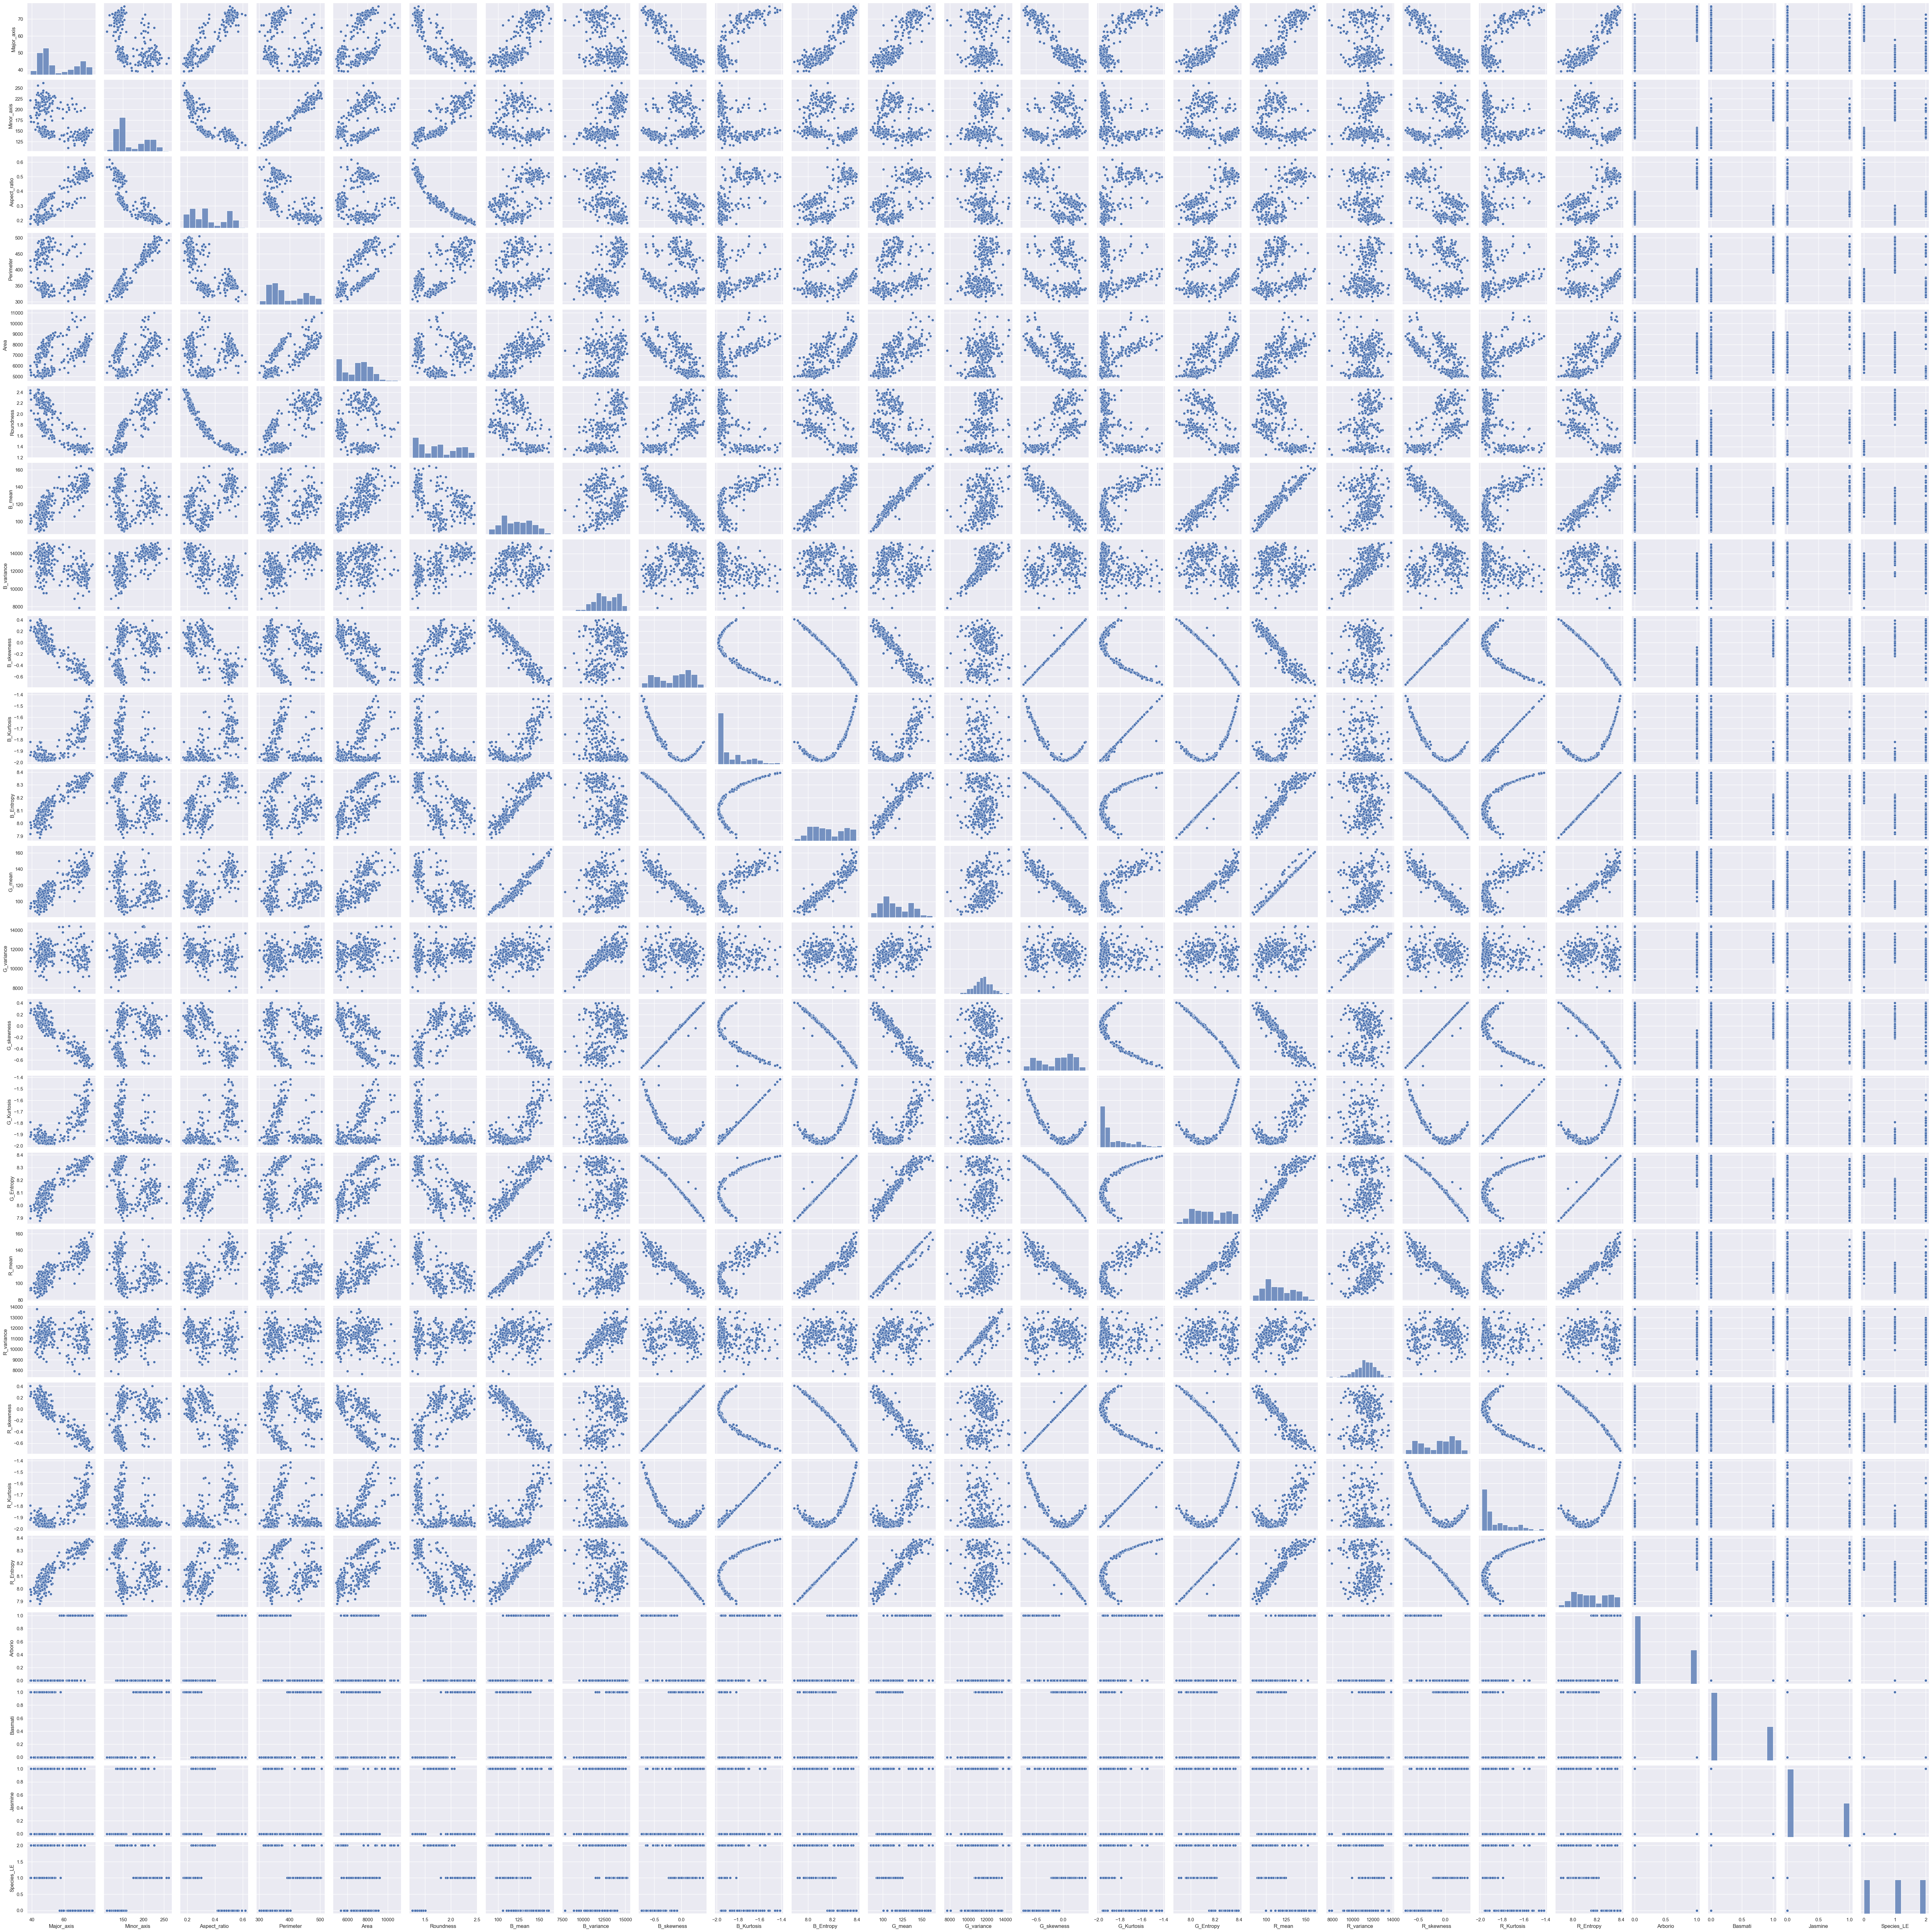

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(df_numerical)

In [10]:
# fitting data to pca model and transform data into a dataframe

df_standardized = df_standardized_og

n = 2
pca = PCA(n_components=n)
pca = pca.fit(df_standardized)
df_pca = pd.DataFrame(pca.transform(df_standardized), columns=['PCA_1', 'PCA_2'])
df_pca

PCA_1     PCA_2
0    1.016253  1.755160
1    7.901817 -0.870910
2    1.812342  0.983647
3    3.903066  0.340648
4    3.001423  3.554114
..        ...       ...
295 -3.440072  1.810531
296 -2.262169  2.775158
297 -4.105284  1.652899
298 -3.447681  2.731829
299 -2.074999  1.256646

[300 rows x 2 columns]

Plotting the PCA components coloring according to species

In [27]:
df_pca

PCA_1     PCA_2  Species
0    1.016253  1.755160  Arborio
1    7.901817 -0.870910  Arborio
2    1.812342  0.983647  Arborio
3    3.903066  0.340648  Arborio
4    3.001423  3.554114  Arborio
..        ...       ...      ...
295 -3.440072  1.810531  Jasmine
296 -2.262169  2.775158  Jasmine
297 -4.105284  1.652899  Jasmine
298 -3.447681  2.731829  Jasmine
299 -2.074999  1.256646  Jasmine

[300 rows x 3 columns]

<AxesSubplot: xlabel='PCA_1', ylabel='PCA_2'>

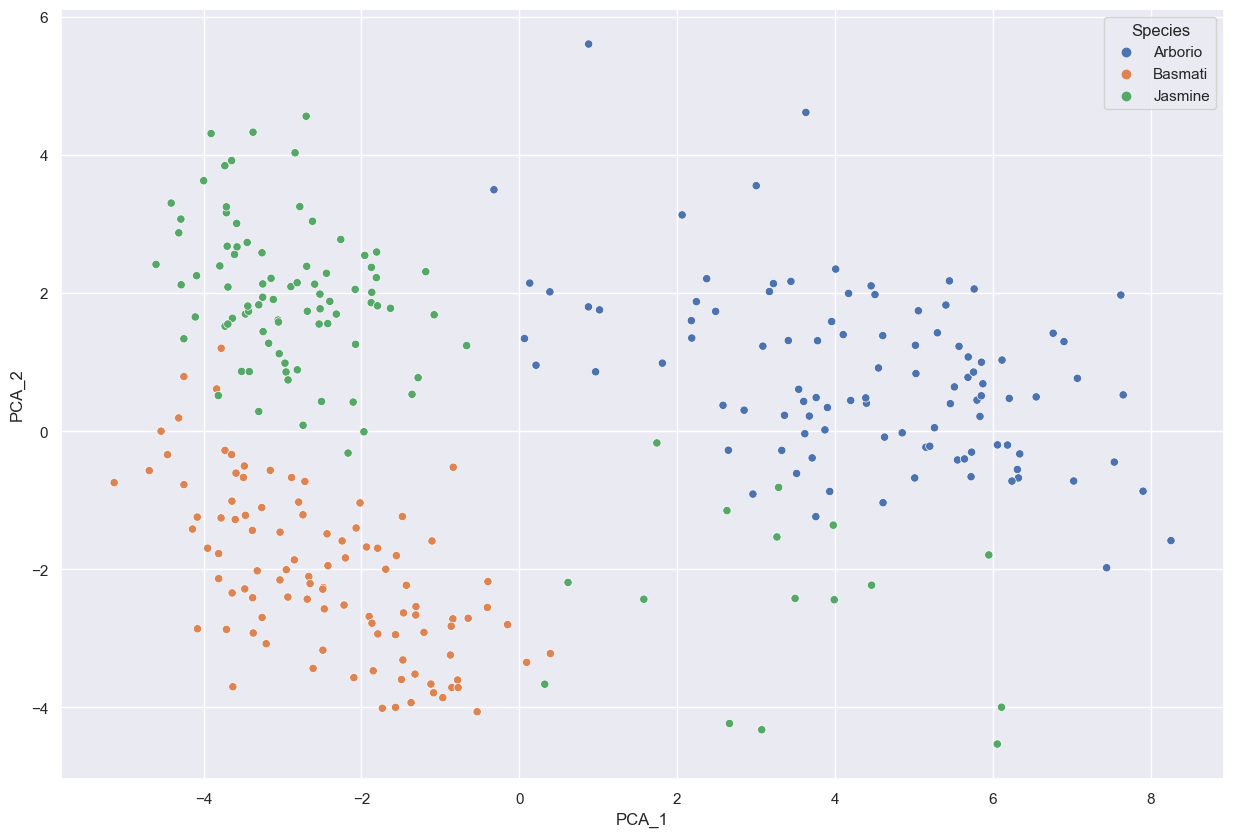

In [30]:
df_pca['Species'] = df_parquet['Species']

sns.scatterplot(data=df_pca,x='PCA_1', y='PCA_2', hue='Species')

Studying the scatterplot we can see somewhat clear clusters between the species. Some outliers are present, especially from Jasmine rice

In [31]:
pca_k = PCA(n_components=7)
pca_k.fit(df_standardized)
pca_k_transformed = pca_k.transform(df_standardized)
pca_k.explained_variance_ratio_.cumsum()

array([0.64573909, 0.85742486, 0.94023957, 0.97538742, 0.98395875,
       0.99063844, 0.99569089])

The following cell is just for finding n-componentes to cover 99% of the variance. It seems the answer is 6 components are required

In [32]:
# Declaring functions for generating classifier

def generate_KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    return knn

def generate_rfc(k, j):
    rfc = RandomForestClassifier(max_depth=k, max_features=j)
    return rfc

def generate_mlp(k,j,l,m):
    mlp = MLPClassifier(random_state=42, early_stopping=True, hidden_layer_sizes=(k,), activation=j, solver=l, validation_fraction=m)
    
    return mlp

In [34]:
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [44]:
# Setting variables for KNN Classifier
k = np.arange(1,11)


# Dataframe to store the results
df_knn = pd.DataFrame(columns=['classifier_name','n_neighbours', 'Accuracy_mean', 'Accuracy_std', 'score_list'])

# Running through for loup creating classifiers and running cvs through them
# Saving the results in a dataframe and a list
knn_list = []
idx = 0
for i in k:
    knn = generate_KNN(i)
    classifier_name = f'knn_{idx}'
    cvs = cross_val_score(knn, X, y, cv=rkf, scoring='accuracy')
    mean = cvs.mean()
    std = cvs.std()
    row = [classifier_name,i,mean,std,cvs]
    df_knn.loc[idx] = row
    idx += 1

In [42]:
# Setting variables for RF classifier
k_list = np.arange(1,11)
j_list = np.arange(1,11)

# Dataframe to store the results
df_rfc = pd.DataFrame(columns=['Classifier_name', 'Max_depth', 'Max_features', 'Accuracy_mean', 'Accuracy_std', 'score_list'])

# Running through for loup creating classifiers and running cvs through them
# Saving the results in a dataframe and a list
rfc_list = []
idx = 0
for i in k_list:
    for j in j_list:
        rfc = generate_rfc(i,j)
        classifier_name = f'rfc_{idx}'
        cvs = cross_val_score(rfc, X, y, cv=rkf, scoring='accuracy')
        mean = cvs.mean()
        std = cvs.std()
        row = [classifier_name,i,j,mean,std,cvs]
        df_rfc.loc[idx] = row
        idx += 1


In [43]:
# Setting variables for MLP Classifier
k = np.arange(1,11)
j = ['logistic', 'relu']
l = ['sgd', 'adam']
m = [float(0.1), float(0.5)]

# Dataframe to store the results
df_mlp = pd.DataFrame(columns=['Classifier_name', 'Hidden_layer_size', 'Activation', 'Solver', 'Val_Frac', 'Accuracy_mean', 'Accuracy_std', 'score_list'])

# Running through for loup creating classifiers and running cvs through them
# Saving the results in a dataframe and a list

products_list = list(product(k,j,l,m))
mlp_list = []
idx = 0
for i,j,l,m in (products_list):
    mlp = generate_mlp(i,j,l,m)
    classifier_name = f'mlp_{idx}'
    cvs = cross_val_score(mlp, X, y, cv=rkf, scoring='accuracy')
    mean = cvs.mean()
    std = cvs.std()
    row = [classifier_name,i,j,l,m,mean,std,cvs]
    df_mlp.loc[idx] = row
    idx += 1


classifier_name  n_neighbours  Accuracy_mean  Accuracy_std  \
2           knn_2             3       0.932222      0.017708   
4           knn_4             5       0.931111      0.019116   
3           knn_3             4       0.926667      0.021773   
5           knn_5             6       0.922222      0.025580   
1           knn_1             2       0.922222      0.022498   
6           knn_6             7       0.921111      0.027532   
7           knn_7             8       0.917778      0.028197   
8           knn_8             9       0.915556      0.030712   
0           knn_0             1       0.913333      0.019437   
9           knn_9            10       0.907778      0.027126   

                                          score_list  \
2  [0.9333333333333333, 0.9166666666666666, 0.95,...   
4  [0.9333333333333333, 0.9166666666666666, 0.933...   
3  [0.9166666666666666, 0.9333333333333333, 0.933...   
5  [0.8833333333333333, 0.9, 0.9333333333333333, ...   
1  [0.95, 0.9666666666666667, 0.9, 0.883333333333...   
6  [0.9166666666666666, 0.9166666666666666, 0.933...   
7  [0.8833333333333333, 0.9166666666666666, 0.933...   
8  [0.9, 0.9166666666666666, 0.9333333333333333, ...   
0  [0.8833333333333333, 0.9166666666666666, 0.916...   
9  [0.8833333333333333, 0.9166666666666666, 0.933...   

                                           test_list  
2  [0.9333333333333333, 0.9166666666666666, 0.95,...  
4  [0.9333333333333333, 0.9166666666666666, 0.933...  
3  [0.9166666666666666, 0.9333333333333333, 0.933...  
5  [0.8833333333333333, 0.9, 0.9333333333333333, ...  
1  [0.95, 0.9666666666666667, 0.9, 0.883333333333...  
6  [0.9166666666666666, 0.9166666666666666, 0.933...  
7  [0.8833333333333333, 0.9166666666666666, 0.933...  
8  [0.9, 0.9166666666666666, 0.9333333333333333, ...  
0  [0.8833333333333333, 0.9166666666666666, 0.916...  
9  [0.8833333333333333, 0.9166666666666666, 0.933...

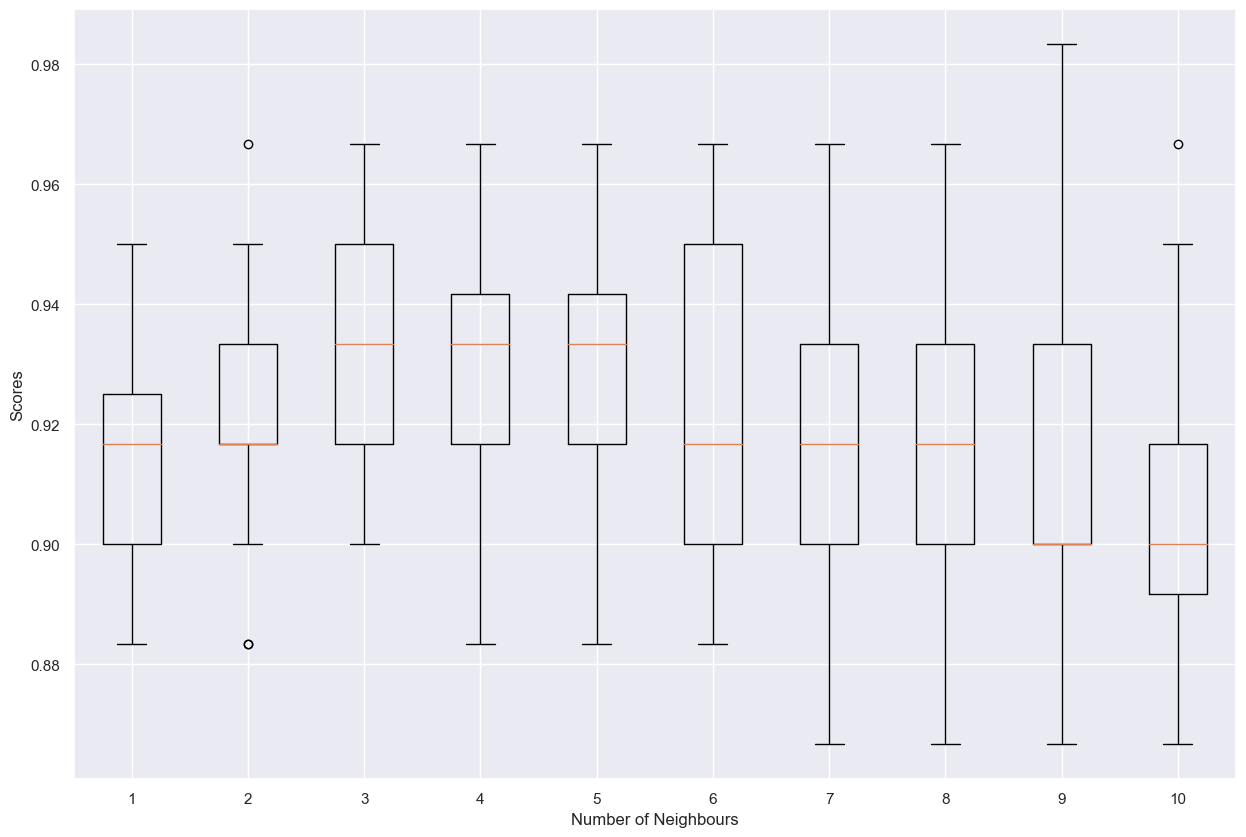

The best value achieved with knn classifiers was with: 
 classifier_name       knn_2
n_neighbours              3
Accuracy_mean      0.932222
Accuracy_std       0.017708
Name: 2, dtype: object


In [125]:
# Plotting the performance and showing top 10 mean accuracy data from dataframe

sorted_df_knn = df_knn.sort_values(by=['Accuracy_mean','Accuracy_std'], ascending=False, kind='mergesort')
display(sorted_df_knn.head(10))

j = plt.boxplot(df_knn['score_list'], labels=df_knn['n_neighbours'])
plt.xlabel('Number of Neighbours')
plt.ylabel('Scores')
plt.show()

print(f'The best value achieved with knn classifiers was with: \n {df_knn.iloc[2,:4]}')

Classifier_name  Max_depth  Max_features  Accuracy_mean  Accuracy_std  \
99          rfc_99         10            10       0.991111      0.014741   
75          rfc_75          8             6       0.991111      0.011967   
79          rfc_79          8            10       0.991111      0.011967   
34          rfc_34          4             5       0.991111      0.011967   
66          rfc_66          7             7       0.991111      0.011967   
56          rfc_56          6             7       0.990000      0.015870   
57          rfc_57          6             8       0.990000      0.015870   
69          rfc_69          7            10       0.990000      0.014657   
76          rfc_76          8             7       0.990000      0.014657   
88          rfc_88          9             9       0.990000      0.014657   

                                           score_list  
99  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
75  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
79  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
34  [1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 1.0, ...  
66  [0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
56  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
57  [0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
69  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
76  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...  
88  [0.9833333333333333, 1.0, 1.0, 1.0, 0.98333333...

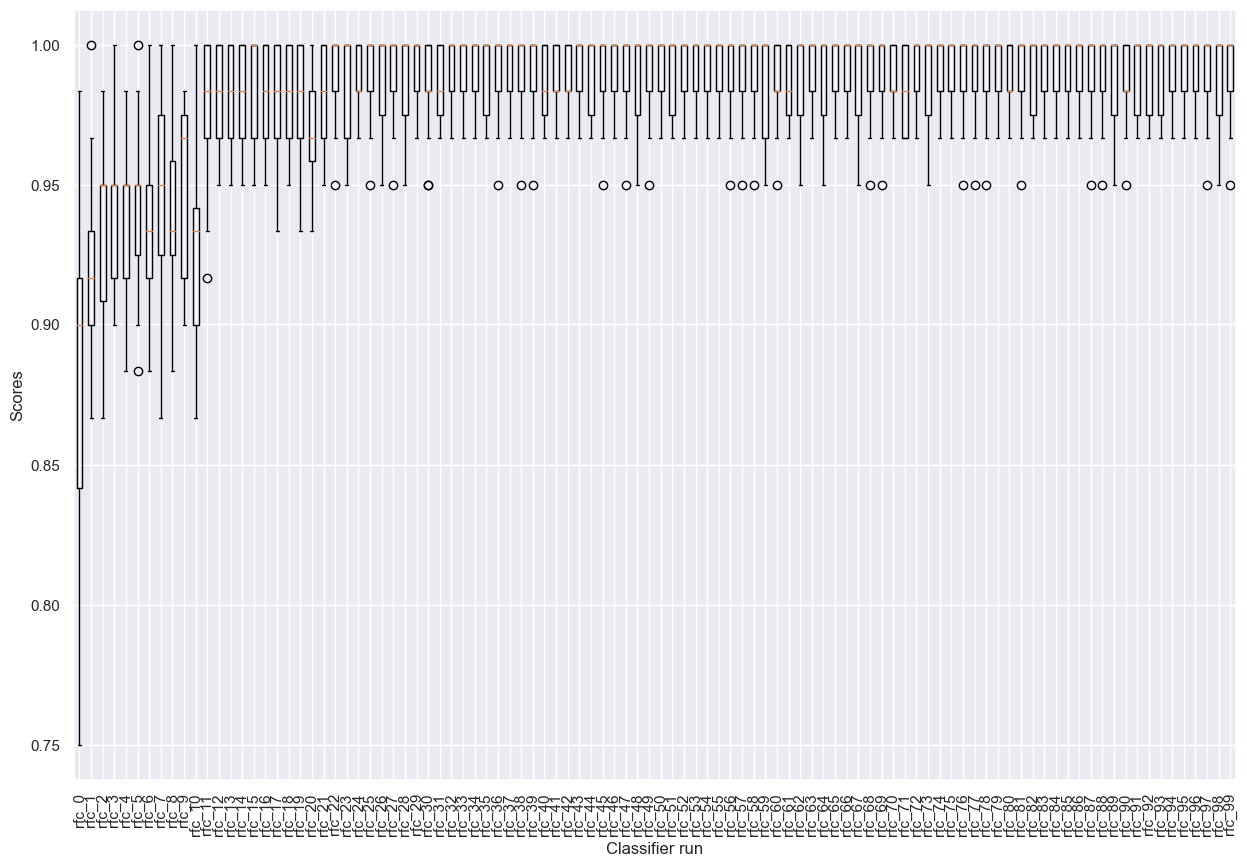

The best value achieved with rfc classifiers was with: 
 Classifier_name      rfc_99
Max_depth                10
Max_features             10
Accuracy_mean      0.991111
Name: 99, dtype: object


In [126]:
# Plotting the performance and showing top 10 mean accuracy data from dataframe

sorted_df_rfc = df_rfc.sort_values(by=['Accuracy_mean','Accuracy_std'], ascending=False, kind='mergesort')
display(sorted_df_rfc.head(10))

j = plt.boxplot(df_rfc['score_list'], labels=df_rfc['Classifier_name'])
plt.xlabel('Classifier run')
plt.ylabel('Scores')
plt.xticks(rotation=90)
plt.show()


print(f'The best value achieved with rfc classifiers was with: \n {df_rfc.iloc[99,:4]}')

df_knn

Classifier_name  Hidden_layer_size Activation Solver  Val_Frac  \
50          mlp_50                  7   logistic   adam       0.1   
75          mlp_75                 10   logistic   adam       0.5   
70          mlp_70                  9       relu   adam       0.1   
42          mlp_42                  6   logistic   adam       0.1   
48          mlp_48                  7   logistic    sgd       0.1   
43          mlp_43                  6   logistic   adam       0.5   
40          mlp_40                  6   logistic    sgd       0.1   
49          mlp_49                  7   logistic    sgd       0.5   
63          mlp_63                  8       relu   adam       0.5   
62          mlp_62                  8       relu   adam       0.1   

    Accuracy_mean  Accuracy_std  \
50       0.550000      0.055109   
75       0.457778      0.108844   
70       0.444444      0.170149   
42       0.412222      0.071094   
48       0.392222      0.140879   
43       0.366667      0.049441   
40       0.356667      0.069868   
49       0.351111      0.103184   
63       0.351111      0.060082   
62       0.345556      0.057564   

                                           score_list  
50  [0.6166666666666667, 0.4666666666666667, 0.483...  
75  [0.31666666666666665, 0.45, 0.4666666666666667...  
70  [0.45, 0.7166666666666667, 0.43333333333333335...  
42  [0.4166666666666667, 0.36666666666666664, 0.41...  
48  [0.36666666666666664, 0.25, 0.3, 0.63333333333...  
43  [0.35, 0.35, 0.38333333333333336, 0.3166666666...  
40  [0.35, 0.26666666666666666, 0.4333333333333333...  
49  [0.36666666666666664, 0.25, 0.5333333333333333...  
63  [0.36666666666666664, 0.2833333333333333, 0.33...  
62  [0.4166666666666667, 0.26666666666666666, 0.35...

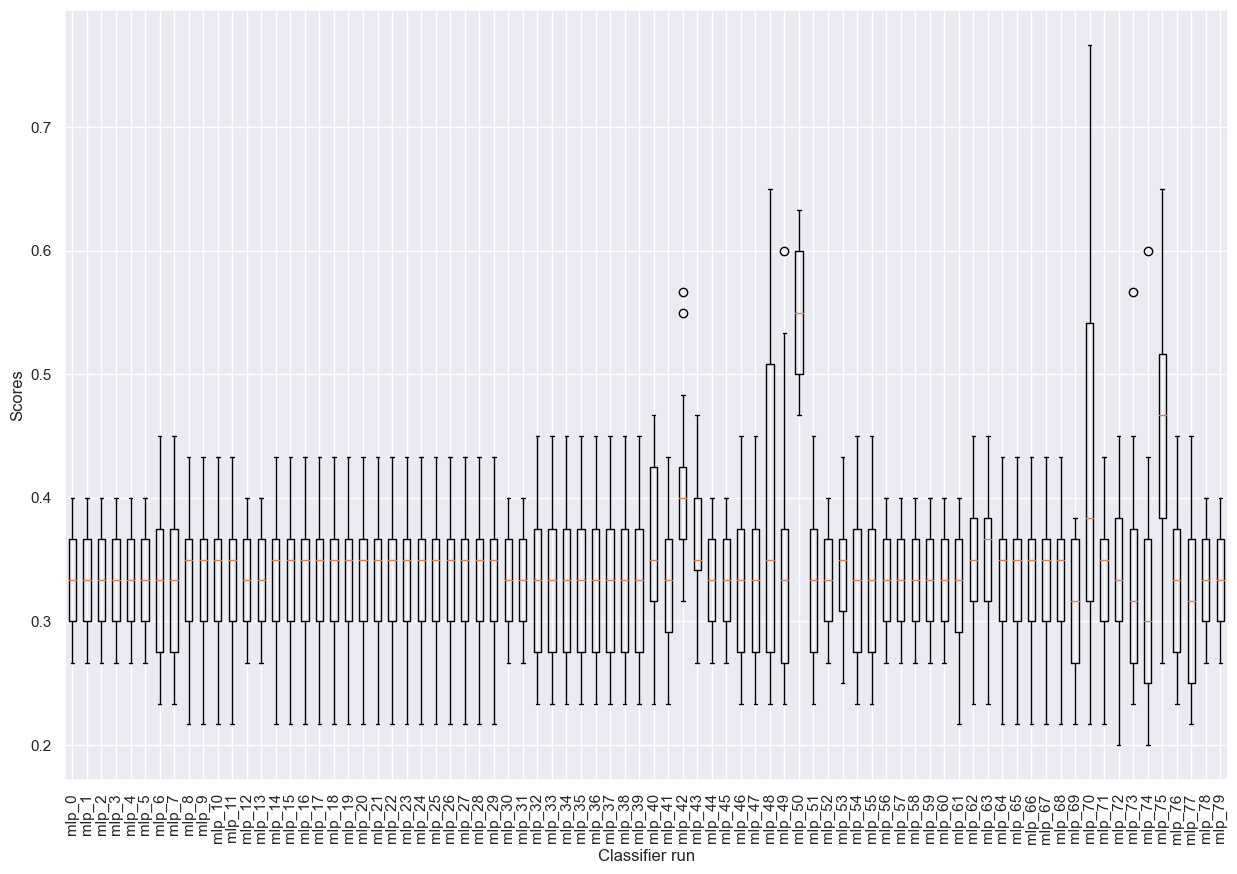

The best value achieved with MLP classifiers was with 
 Classifier_name                                                 mlp_50
Hidden_layer_size                                                    7
Activation                                                    logistic
Solver                                                            adam
Val_Frac                                                           0.1
Accuracy_mean                                                     0.55
Accuracy_std                                                  0.055109
score_list           [0.6166666666666667, 0.4666666666666667, 0.483...
Name: 50, dtype: object


In [120]:
# Plotting the performance and showing top 10 mean accuracy data from dataframe

sorted_df_mlp = df_mlp.sort_values(by=['Accuracy_mean','Accuracy_std'], ascending=False, kind='mergesort')
display(sorted_df_mlp.head(10))

j = plt.boxplot(df_mlp['score_list'], labels=df_mlp['Classifier_name'])
plt.xlabel('Classifier run')
plt.ylabel('Scores')
plt.xticks(rotation=90)
plt.show()

print(f'The best value achieved with MLP classifiers was with: \n {df_mlp.iloc[50,:]}')

Finding out feature importance of random forest

In [144]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# Creating a new RF classifier to fit the data
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

df_features = pd.DataFrame(columns=X.columns.tolist() )
df_features.loc[0] = rfc.feature_importances_

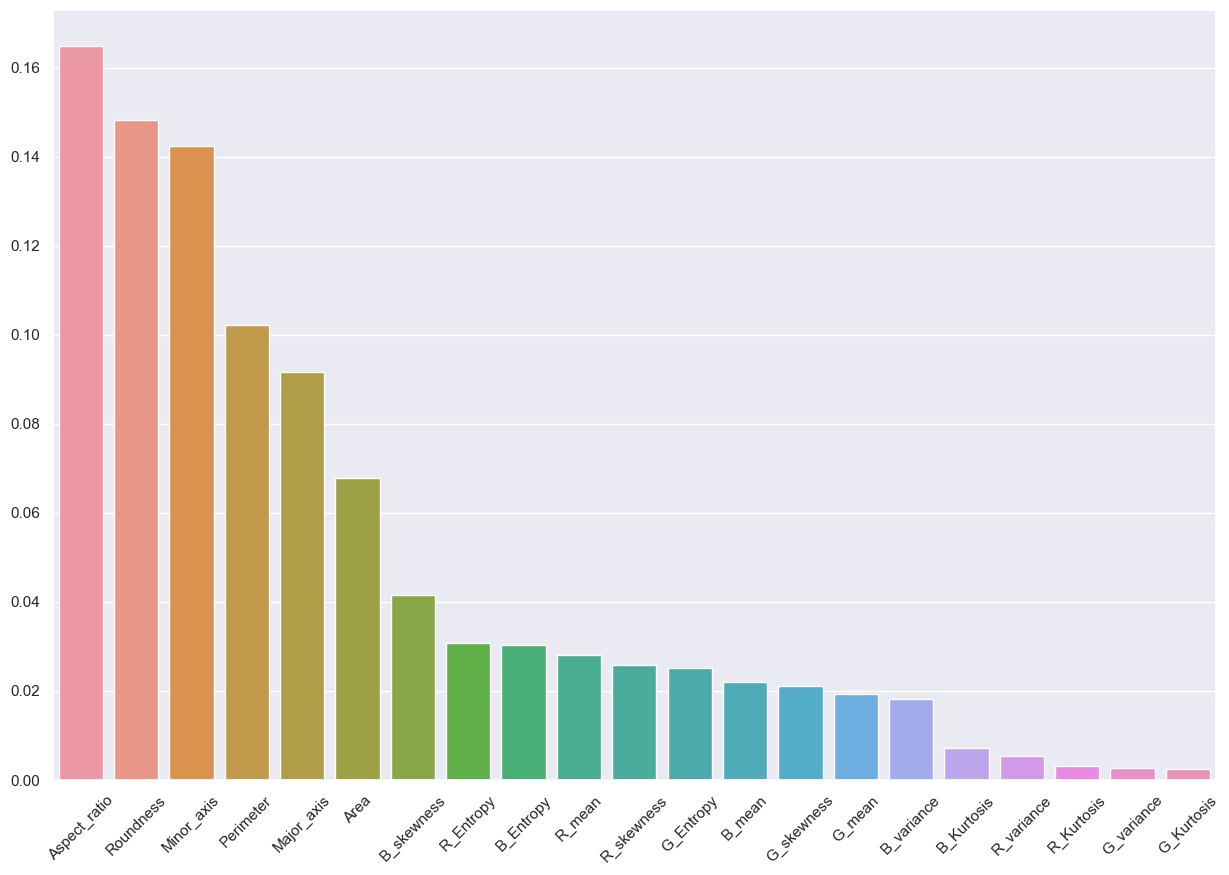

In [160]:
index_sort = df_features.mean().sort_values(ascending=False).index
df_sorted = df_features[index_sort]
sns.barplot(df_sorted)
plt.xticks(rotation=45)
plt.show()

The feature importance shows us that the features considering the physical size and shape of the rice seem to be most important ones. This can also be spotten in the pairplot where you can see the different rices create clusters in the features considering physical size and shape of the rice. The colors do play a bit of role but i believe they generally look alike in colour.

When selecting a model to be used, we should definitely consider the amount of features we should use to train the model. For example, RF classifier implies that using color features might be insignificant to the result when mlp pays no attention to the number of features. KNN would be great if features were not known yet. 